In [178]:
import numpy as np
import cv2 as cv
import glob
import csv
from io import StringIO
from matplotlib import pyplot as plt

%matplotlib inline

In [36]:
def neighbours_count(i,j,Game_matrix):
    Grid_dimension = Game_matrix.shape[0]
    neighbours = 0
    for k in range(-1,2):
        if i+k < 0 or i+k>=Grid_dimension:
            pass
        else:
            for l in range(-1,2):
                if j+l < 0 or j+l>=Grid_dimension or (k,l)==(0,0):
                    pass
                else:
                    neighbours+=Game_matrix[i+k,j+l]
    return neighbours

In [34]:
def game_of_life(i, j , Game_matrix):
    cell_state = Game_matrix[i][j]
    neighbours = neighbours_count(i,j,Game_matrix)
    if cell_state:
        if neighbours < 2:
            return 0
        elif neighbours < 4:
            return 1
        else:
            return 0
    else:
        if neighbours == 3:
            return 1
        else:
            return 0

In [26]:
def evolution(Game_matrix):
    Grid_dimension = Game_matrix.shape[0]
    next_Game_matrix = np.zeros((Grid_dimension,Grid_dimension), dtype=int)
    for i in range(Grid_dimension):
        for j in range(Grid_dimension):
            next_Game_matrix[i][j] = game_of_life(i,j, Game_matrix)
    return next_Game_matrix

In [27]:
def Game_cycle(initial_Game_matrix, nbr_steps):
    game_cycle = [initial_Game_matrix]
    for i in range(nbr_steps-1):
        game_cycle.append(evolution(game_cycle[-1]))
    return game_cycle

In [129]:
def Matrix_to_image(Game_matrix,cell_dim):
    Grid_dimension = Game_matrix.shape[0]
    img = np.zeros((cell_dim*Grid_dimension,cell_dim*Grid_dimension,3), np.uint8)
    for i in range(Grid_dimension):
        for j in range(Grid_dimension):
            if Game_matrix[i][j]:
                cv.rectangle(img,(cell_dim*i,cell_dim*j),(cell_dim*(i+1),cell_dim*(j+1)),(0,255,0),-1)
    for i in range(1,Grid_dimension):
                cv.line(img,(cell_dim*i,0),(cell_dim*i,cell_dim*Grid_dimension),(255,0,255),1)
                cv.line(img,(0,cell_dim*i),(cell_dim*Grid_dimension,cell_dim*i),(255,0,255),1)
    return img

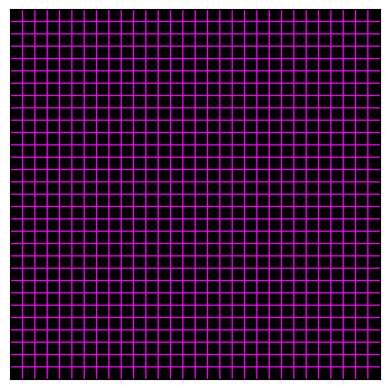

In [108]:
#empty grid
Grid_dimension = 30
Game_matrix = np.zeros((Grid_dimension,Grid_dimension), dtype=int)
cell_dim=30
plt.imshow(Matrix_to_image(Game_matrix,cell_dim))
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

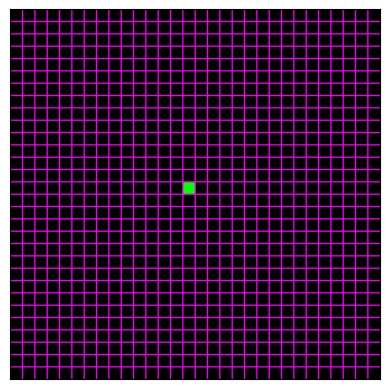

In [107]:
#one alive cell
Grid_dimension = 30
Game_matrix = np.zeros((Grid_dimension,Grid_dimension), dtype=int)
cell_dim=30

Game_matrix[14,14]=1

plt.imshow(Matrix_to_image(Game_matrix,cell_dim))
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

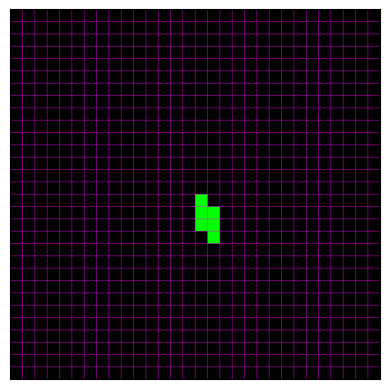

In [163]:
#toad
Grid_dimension = 30
Game_matrix = np.zeros((Grid_dimension,Grid_dimension), dtype=int)
cell_dim=30

Game_matrix[15,15:18]=1
Game_matrix[16,16:19]=1

plt.imshow(Matrix_to_image(Game_matrix,cell_dim))
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

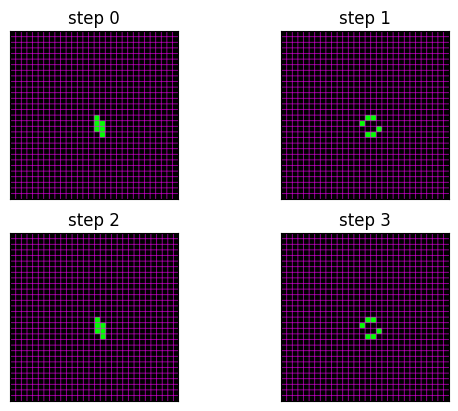

In [105]:
#toad life
steps = 4
for i,matrix in enumerate([Matrix_to_image(matrix,cell_dim) for matrix in Game_cycle(Game_matrix,steps)]):
    plt.subplot(2,2,i+1),plt.imshow(matrix),plt.title(f'step {i}')
    plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

In [46]:
#toad life video
Grid_dimension = 30
Game_matrix = np.zeros((Grid_dimension,Grid_dimension), dtype=int)
Game_matrix[15,15:18]=1
Game_matrix[16,16:19]=1

steps = 30
img_array = [Matrix_to_image(matrix) for matrix in Game_cycle(Game_matrix,steps)]
height, width, layers = img_array[0].shape
size = (width,height)
fps = 2

out = cv.VideoWriter('Game_of_life-Toad.avi',cv.VideoWriter_fourcc(*'DIVX'), fps, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [49]:
#30 step flower life video
Grid_dimension = 30
Game_matrix = np.zeros((Grid_dimension,Grid_dimension), dtype=int)
cell_dim = 30
Game_matrix[12:15,15]=1
Game_matrix[16:19,15]=1
Game_matrix[15,17:20]=1
Game_matrix[15,11:14]=1

steps = 50
img_array = [Matrix_to_image(matrix,cell_dim) for matrix in Game_cycle(Game_matrix,steps)]
height, width, layers = img_array[0].shape
size = (width,height)
fps = 2


out = cv.VideoWriter('Game_of_life-30 step flower.avi',cv.VideoWriter_fourcc(*'DIVX'), fps, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [182]:
#initial seed creator
def Seed_matrix_creation(Seed_matrix,cell_dim):
    
    Grid_dimension=Seed_matrix.shape[0]
    img = Matrix_to_image(Seed_matrix,cell_dim)
    mode = False
    
    def creating_life(event,x,y,flags,param):
        
        global Grid_dimension, mode
        
        i, j = x//cell_dim, y//cell_dim
        
        if i<Grid_dimension and j<Grid_dimension:
            if event == cv.EVENT_LBUTTONDOWN:
                mode =True
                if Seed_matrix[i,j]==0:
                    cv.rectangle(img,(cell_dim*i+1,cell_dim*j+1),(cell_dim*(i+1)-1,cell_dim*(j+1)-1),(0,255,0),-1)
                    Seed_matrix[i,j]=1
                else:
                    cv.rectangle(img,(cell_dim*i+1,cell_dim*j+1),(cell_dim*(i+1)-1,cell_dim*(j+1)-1),(0,0,0),-1)
                    Seed_matrix[i,j]=0

            if event == cv.EVENT_MOUSEMOVE:
                if mode:
                    cv.rectangle(img,(cell_dim*i+1,cell_dim*j+1),(cell_dim*(i+1)-1,cell_dim*(j+1)-1),(0,255,0),-1)
                    Seed_matrix[i,j]=1

            if event == cv.EVENT_LBUTTONUP:
                mode = False
            
            
    def nothing(x):
        pass
    
    cv.namedWindow('Game_of_life')
    
    cv.setMouseCallback('Game_of_life',creating_life)
    
    cv.createTrackbar('Steps','Game_of_life',50,1000,nothing)
    cv.createTrackbar('Evolutions per secondes','Game_of_life',4,20,nothing)
    
    while(1):
        cv.imshow('Game_of_life',img)
        
        steps = cv.getTrackbarPos('Steps','Game_of_life')
        fps = cv.getTrackbarPos('Evolutions per secondes','Game_of_life')
        
        if cv.waitKey(20) & 0xFF == ord('q'):
            break
        
    cv.destroyAllWindows()
    
    return [Seed_matrix,steps,fps]

# Grid_dimension=30
# cell_dim=30
# Seed_matrix = np.zeros((Grid_dimension,Grid_dimension), dtype=int)
# Seed_matrix_creation(Seed_matrix,cell_dim)

In [184]:
#Game of life seed creation to video

Grid_dimension=60
cell_dim=10
Seed_matrix = np.zeros((Grid_dimension,Grid_dimension), dtype=int)
res = Seed_matrix_creation(Seed_matrix,cell_dim)
Seed_matrix,steps,fps = res[0],res[1],res[2]
img_array = [Matrix_to_image(matrix,cell_dim) for matrix in Game_cycle(Seed_matrix,steps)]
height, width, layers = img_array[0].shape
size = (width,height)

out = cv.VideoWriter('Game_of_life-temporary generated.avi',cv.VideoWriter_fourcc(*'DIVX'), fps, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

# cap = cv.VideoCapture('Game_of_life-temporary generated.avi')
# while cap.isOpened():
#     ret, frame = cap.read()
#     cv.imshow('Game_of_life', frame)
#     if cv.waitKey(25) == ord('q'):
#         break
# cap.release()
# cv.destroyAllWindows()

**Work in progress**

In [149]:

#saving interestings games to csv

def saving_game_to_csv(name,seed_matrix,steps,fps):
    
    game_dict={'seed_matrix':seed_matrix,'steps':steps,'fps':fps}

    with open(f'Saved_games/{name}.csv', 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=game_dict.keys())
        writer.writeheader()
        writer.writerow(game_dict)

In [153]:
saving_game_to_csv('Smiley',Seed_matrix,steps,fps)

In [180]:
def load_game(name):
    with open(f'Saved_games/{name}.csv') as csvfile:
        reader = csv.DictReader(csvfile, skipinitialspace=True)
        for game in reader:
            seed_matrix = game['seed_matrix']
            steps = game['steps']
            fps = game['fps']
    return [seed_matrix,steps,fps]

game = load_game('Smiley')
np.loadtxt(StringIO(game[0].replace('[',' ').replace(']',' ').replace(',',' ')))
#plt.imshow(Matrix_to_image(game[0],30))

ValueError: could not convert string '...' to float64 at row 0, column 4.